# Lab. de IA - Redes Neurais: Perceptron

# Pre-processamento dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True

In [2]:
# Abrindo o arquivo de dados e iniciando o dataframe
header = ["Incidencia Pélvica", "Inclinação Pélvica", "Ângulo da Lordose Lombar", "Inclinação Sacral", "Raio Pélvico", "Grau de Espondilolistese", "Saída"]
file = "./data/column_3C.dat"
data_frame = pd.read_csv(file, sep = ' ', header = None)
data_frame.columns = header

In [3]:
# Criando uma coluna de saída binária para cada tipo de saída
data_frame['NO'] = np.where(data_frame['Saída'] == 'NO', 1, 0)
data_frame['SL'] = np.where(data_frame['Saída'] == 'SL', 1, 0)
data_frame['DH'] = np.where(data_frame['Saída'] == 'DH', 1, 0)

In [4]:
# Imprimindo data frame atual
data_frame

,Incidencia Pélvica,Inclinação Pélvica,Ângulo da Lordose Lombar,Inclinação Sacral,Raio Pélvico,Grau de Espondilolistese,Saída,NO,SL,DH
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH,0,0,1
1,39.06,10.06,25.02,29.00,114.41,4.56,DH,0,0,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH,0,0,1
3,69.30,24.65,44.31,44.64,101.87,11.21,DH,0,0,1
4,49.71,9.65,28.32,40.06,108.17,7.92,DH,0,0,1
...,...,...,...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO,1,0,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO,1,0,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO,1,0,0
308,45.25,8.69,41.58,36.56,118.55,0.21,NO,1,0,0


In [5]:
# Separando dados para aprendizagem (70%) e dados para teste (30%)
To_learn = 0.7
To_test = 0.3

DH_Outputs = (data_frame['Saída'] == 'DH').value_counts()
SL_Outputs = (data_frame['Saída'] == 'SL').value_counts()
NO_Outputs = (data_frame['Saída'] == 'NO').value_counts()

DH_Learn = data_frame[data_frame['Saída'] == 'DH']
DH_Learn = DH_Learn[0:int(DH_Outputs[True] * To_learn)]
DH_Test = data_frame[data_frame['Saída'] == 'DH']
DH_Test = DH_Test[int(DH_Outputs[True] * To_learn):DH_Outputs[True]]

SL_Learn = data_frame[data_frame['Saída'] == 'SL']
SL_Learn = SL_Learn[0:int(SL_Outputs[True] * To_learn)]
SL_Test = data_frame[data_frame['Saída'] == 'SL']
SL_Test = SL_Test[int(SL_Outputs[True] * To_learn):SL_Outputs[True]]

NO_Learn = data_frame[data_frame['Saída'] == 'NO']
NO_Learn = NO_Learn[0:int(NO_Outputs[True] * To_learn)]
NO_Test = data_frame[data_frame['Saída'] == 'NO']
NO_Test = NO_Test[int(NO_Outputs[True] * To_learn):NO_Outputs[True]]

In [6]:
# Juntando todos os dados de aprendizagem e misturando-os
df_Learn = [DH_Learn, SL_Learn, NO_Learn]
df_Learn = pd.concat(df_Learn)
df_Learn = df_Learn.sample(frac = 1)
df_Learn

,Incidencia Pélvica,Inclinação Pélvica,Ângulo da Lordose Lombar,Inclinação Sacral,Raio Pélvico,Grau de Espondilolistese,Saída,NO,SL,DH
263,33.79,3.68,25.50,30.11,128.33,-1.78,NO,1,0,0
245,47.81,10.69,54.00,37.12,125.39,-0.40,NO,1,0,0
134,52.20,17.21,78.09,34.99,136.97,54.94,SL,0,1,0
252,42.92,-5.85,58.00,48.76,121.61,-3.36,NO,1,0,0
22,63.07,24.41,54.00,38.66,106.42,15.78,DH,0,0,1
...,...,...,...,...,...,...,...,...,...,...
21,54.92,21.06,42.20,33.86,125.21,2.43,DH,0,0,1
13,53.57,20.46,33.10,33.11,110.97,7.04,DH,0,0,1
142,85.29,18.28,100.74,67.01,110.66,58.88,SL,0,1,0
277,65.76,13.21,44.00,52.55,129.39,-1.98,NO,1,0,0


In [7]:
# Juntando todos os dados de teste e misturando-os
df_Test = [DH_Test, SL_Test, NO_Test]
df_Test = pd.concat(df_Test)
df_Test = df_Test.sample(frac = 1)
df_Test

,Incidencia Pélvica,Inclinação Pélvica,Ângulo da Lordose Lombar,Inclinação Sacral,Raio Pélvico,Grau de Espondilolistese,Saída,NO,SL,DH
56,43.35,7.47,28.07,35.88,112.78,5.75,DH,0,0,1
309,33.84,5.07,36.64,28.77,123.95,-0.20,NO,1,0,0
165,83.70,20.27,77.11,63.43,125.48,69.28,SL,0,1,0
51,74.43,41.56,27.70,32.88,107.95,5.00,DH,0,0,1
283,49.00,13.11,51.87,35.88,126.40,0.54,NO,1,0,0
...,...,...,...,...,...,...,...,...,...,...
207,74.09,18.82,76.03,55.27,128.41,73.39,SL,0,1,0
194,72.64,18.93,68.00,53.71,116.96,25.38,SL,0,1,0
296,39.66,16.21,36.67,23.45,131.92,-4.97,NO,1,0,0
55,47.66,13.28,36.68,34.38,98.25,6.27,DH,0,0,1


In [8]:
# Função para calcular a saída do neuronio
def calc_saida (pesos, entrada, bias):
    saida = np.dot(pesos, entrada) + bias
    return saida

In [9]:
# Função para aplicar o Degrau nos resultados obtidos
def degrau (saida):
    saida_binaria = []
    for i in range (0, len(saida)):
        if saida[i] >= 0:
            saida_binaria.append(1)
        else:
            saida_binaria.append(0)
    return saida_binaria

In [10]:
# Função para obter a saída Sigmoide da amostra
def sigmoide (saida):
    saida_sigmoide = []
    for i in range (0, len(saida)):
        sig = 1 / (1 + np.exp(-saida[i]))
        saida_sigmoide.append(sig)
    return saida_sigmoide

In [11]:
# Função para binarizar as saída da função Sigmoide a partir do maior valor (max)
def bin_sigmoide(saida_sigmoide):
    saida_binaria = []
    max_index = np.where(saida_sigmoide == max(saida_sigmoide))[0][0]
    for i in range(0, len(saida_sigmoide)):
        saida_binaria.append(0)
    saida_binaria[max_index] = 1
    return saida_binaria        

In [12]:
# Função para calcular o erro da amostra
def calc_erro (saida_esperada, saida):
    erro = saida_esperada - saida
    desvio_erro = np.dot(erro, erro.T)
    return erro, desvio_erro

In [13]:
# Função para calcular os novos pesos
def calc_pesos (pesos, entrada, erro, taxa_aprendizado):
    entrada = entrada.values.reshape(1, 6)
    erro = erro.reshape(3, 1)
    pesos_novo = pesos + taxa_aprendizado * np.dot(erro, entrada)
    return pesos_novo

In [14]:
# Função para calcular o bias
def calc_bias (bias, erro, taxa_aprendizado):
    bias_novo = bias + taxa_aprendizado * erro
    return bias_novo

In [15]:
# Função para treinar a Rede Neural >:3
def treina_rede(peso, bias, data_learn, tipo_funcao, maximo_iteracoes, taxa_aprendizado):
    epoca = 1; erro_total_epoca = 1;
    erro_epocas = []; 

    while (epoca < maximo_iteracoes) and (erro_total_epoca > 0):   
        erro_total_epoca = 0
        for i in range(0, len(data_learn)):
            # Recebendo a amostra Xi
            x = data_learn.iloc[[i]]
            saida_desejada = x.T[7:10]
            xt = x.T[:6]
            entrada = xt[xt.columns[0]]
            # Calculando a saída Yi
            y = calc_saida(peso, entrada, bias)
            if tipo_funcao == 'degrau':
                y = degrau(y)
            elif tipo_funcao == 'sigmoide':
                y = sigmoide(y)
            # Obtendo erros:
            erros = calc_erro(np.array(saida_desejada[saida_desejada.columns[0]]), y)
            erro_amostra = erros[0]
            erro_quadratico_amostra = erros[1]
            erro_total_epoca += erro_quadratico_amostra
            # Obtendo novos pesos
            peso = calc_pesos(peso, entrada, erro_amostra, taxa_aprendizado)
            bias = calc_bias(bias, erro_amostra, taxa_aprendizado)
        erro_epocas.append(erro_total_epoca)
        epoca = epoca + 1    
    return erro_epocas, peso, bias

In [16]:
# Função para testar a Rede Neural:
def teste_rede (peso, bias, data_test, tipo_funcao):
    numero_acertos = 0
    for i in range(0, len(df_Test)):
        amostra = df_Test.iloc[[i]]
        saida_desejada_teste = amostra.T[7:10].values
        saida_desejada_teste = str(saida_desejada_teste[0][0]) + str(saida_desejada_teste[1][0]) + str(saida_desejada_teste[2][0])
        x_teste = amostra.T[0:6]
        x_teste = x_teste[x_teste.columns[0]]
        saida_encontrada_teste = calc_saida(peso, x_teste, bias)
        if tipo_funcao == 'degrau':
            saida_encontrada_teste = degrau(saida_encontrada_teste)
        elif tipo_funcao == 'sigmoide':
            saida_encontrada_teste = bin_sigmoide(saida_encontrada_teste)
        saida_encontrada_teste = str(saida_encontrada_teste[0]) + str(saida_encontrada_teste[1]) + str(saida_encontrada_teste[2])
        if saida_desejada_teste == saida_encontrada_teste:
            numero_acertos = numero_acertos + 1

    acuracia = numero_acertos / len(df_Test)
    return acuracia

# Rede Neural utilizando DEGRAU:

In [17]:
# Gerando os primeiros valores aleatoios para 'w' e 'b' para a função DEGRAU
w = np.random.uniform(-1,1, size=(3,6))
b = np.random.uniform(-1,1, size=(3))

print(w)
print(b)

[[ 0.57949809 -0.71787251 -0.4134133  -0.711447   -0.06009915  0.09659587]
 [-0.68369824  0.14622696  0.23806264 -0.56171646 -0.19310768  0.52014403]
 [ 0.71431436  0.19204557  0.17971434  0.43604054 -0.97868819  0.83326921]]
[ 0.08766083  0.54521996 -0.82151274]


In [18]:
taxa_aprendizado = 0.5; maximo_iteracoes = 121;
tipo_funcao = 'degrau'
treino_degrau = treina_rede(w, b, df_Learn, tipo_funcao, maximo_iteracoes, taxa_aprendizado)
print("Erro por epoca: " + str(treino_degrau[0]))

Erro por epoca: [165, 133, 128, 120, 123, 116, 120, 108, 118, 114, 115, 109, 122, 116, 109, 104, 117, 116, 118, 118, 111, 112, 115, 112, 125, 108, 118, 115, 114, 114, 116, 111, 102, 109, 114, 115, 115, 117, 114, 113, 106, 110, 109, 118, 105, 114, 111, 103, 101, 122, 118, 110, 108, 120, 108, 112, 118, 96, 113, 110, 109, 113, 107, 107, 104, 115, 107, 112, 114, 100, 115, 111, 95, 108, 111, 104, 109, 108, 113, 116, 112, 118, 110, 106, 115, 111, 102, 97, 109, 101, 110, 111, 103, 108, 124, 110, 118, 99, 116, 114, 107, 104, 109, 109, 123, 121, 113, 109, 117, 105, 104, 108, 103, 109, 116, 117, 118, 121, 110, 106]


In [19]:
peso_DEGRAU = treino_degrau[1]
bias_DEGRAU = treino_degrau[2]

print("Pesos: " + str(peso_DEGRAU))
print("\n Bias: " + str(bias_DEGRAU))

Pesos: [[-255.87050191092553 -326.32787251027077 477.74658670064554
  68.26855300342939 -49.17009914586949 -669.6534041320186]
 [-0.8086982420288074 -95.02877304496404 -3.646937356303969
  95.2182835401547 -141.93310767586462 755.1401440263154]
 [128.93931436143887 323.3820455698304 -312.01028566420774
  -196.45895945766284 106.17631180645304 -356.43673079281206]]

 Bias: [-106.41233916843872 -31.454780041973265 107.6784872615467]


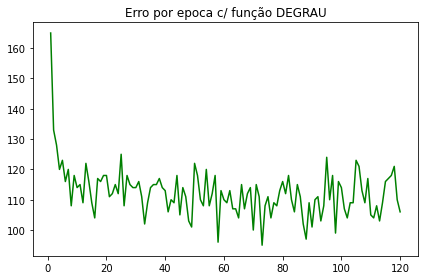

In [20]:
coord_x = list(range(1, 121))
coord_yDEGRAU = treino_degrau[0]

plt.title("Erro por epoca c/ função DEGRAU")
plt.plot(coord_x, coord_yDEGRAU, color="green")
plt.show()

In [21]:
tipo_funcao = 'degrau'
acuracia_degrau = teste_rede(peso_DEGRAU, bias_DEGRAU, df_Test, tipo_funcao)
print("Acuracia para a Rede Neural utilizando a função DEGRAU foi de: " + str(acuracia_degrau * 100) + "%")

Acuracia para a Rede Neural utilizando a função DEGRAU foi de: 65.59139784946237%


# Rede Neural utilizando SIGMOIDE:

In [22]:
# Gerando os primeiros valores aleatoios para 'w' e 'b' para a função SIGMOIDE
w = np.random.uniform(-1,1, size=(3,6))
b = np.random.uniform(-1,1, size=(3))

print(w)
print(b)

[[ 0.51580757  0.78101777  0.95982435  0.97611408  0.50040402 -0.25366755]
 [ 0.85140095 -0.73674648 -0.58071515 -0.75387166 -0.37649466 -0.65541727]
 [-0.6382726  -0.23189617  0.94100434  0.83848652  0.59223886 -0.35713996]]
[-0.77913949 -0.22033964  0.80186771]


In [23]:
taxa_aprendizado = 0.5; maximo_iteracoes = 121;
tipo_funcao = 'sigmoide'
treino_sigmoide = treina_rede(w, b, df_Learn, tipo_funcao, maximo_iteracoes, taxa_aprendizado)
print("Erro por epoca: " + str(treino_sigmoide[0]))

C:\Users\Mark\AppData\Local\Temp\ipykernel_10400\147260631.py:5: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-saida[i]))


Erro por epoca: [170.95379203199352, 126.0, 114.0011124763397, 121.00055243984038, 123.00000050385582, 122.0, 122.0, 110.0, 114.00000000405204, 110.00005494519753, 115.0017304709854, 119.0, 125.0, 109.99999999999855, 113.0, 115.9999998992488, 121.0, 117.00000014597086, 107.99999998218871, 117.99999971190068, 113.99960450635295, 117.99999853308168, 120.00000000000313, 113.0, 116.46626409661106, 105.99999982332281, 113.96778542173128, 115.0, 109.51171140248668, 102.99999926946802, 115.02592907353103, 105.999127347814, 116.99999999999994, 111.0, 108.0, 112.00000000088002, 103.99999994719128, 118.0, 113.99999993764388, 112.0, 108.99999999999994, 107.0, 110.02008413923747, 121.0, 102.97967488549534, 113.0, 111.2961610210152, 123.66932530856543, 95.99999999942976, 114.99999999875035, 101.0, 115.99999985188344, 107.84234318583533, 109.83499527761745, 115.0, 103.99999999999974, 107.99999999995036, 106.00000000000003, 101.99964061993151, 114.00000000043188, 117.99999594511173, 120.9967218546989

In [24]:
peso_SIGMOIDE = treino_sigmoide[1]
bias_SIGMOIDE = treino_sigmoide[2]

print("Pesos: " + str(peso_SIGMOIDE))
print("\n Bias: " + str(bias_SIGMOIDE))

Pesos: [[-247.64749841696425 -323.307992642285 488.78287401104046
  76.67584956412362 -59.466596717598975 -683.2330230941421]
 [34.8257000767902 -81.2843371138309 -5.651991782807116
  114.48586497000176 -116.5961769699856 755.0593239225304]
 [101.30225775632587 318.7282040354953 -280.6190468104809
  -217.92003612162057 101.3034886884468 -306.28718484732497]]

 Bias: [-105.71897712306493 -32.299924327590624 107.885349489629]


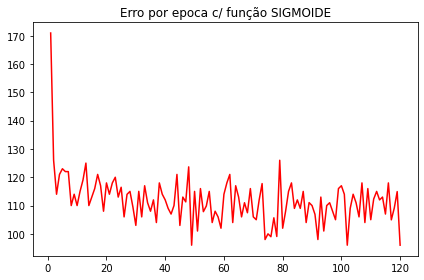

In [25]:
coord_x = list(range(1, maximo_iteracoes))
coord_ySIGMOIDE = treino_sigmoide[0]

plt.title("Erro por epoca c/ função SIGMOIDE")
plt.plot(coord_x, coord_ySIGMOIDE, color="red")
plt.show()

In [26]:
tipo_funcao = 'sigmoide'
acuracia_sigmoide = teste_rede(peso_SIGMOIDE, bias_SIGMOIDE, df_Test, tipo_funcao)
print("Acuracia para a Rede Neural utilizando a função DEGRAU foi de: " + str(acuracia_sigmoide * 100) + "%")

Acuracia para a Rede Neural utilizando a função DEGRAU foi de: 73.11827956989248%


# Resultados

Podemos perceber que a acuracia usando o método de SIGMOIDE foi consideravelmente superior ao treinamento usando a função limiar como a função DEGRAU, os gráficos de Erro acumulado por época junto da acuracia encontrada pelas duas funções pode ser re-visto abaixo:

Lembrando que para o treinamento foi utilizado 121 iterações/epocas com uma taxa de aprendizado de 0.5

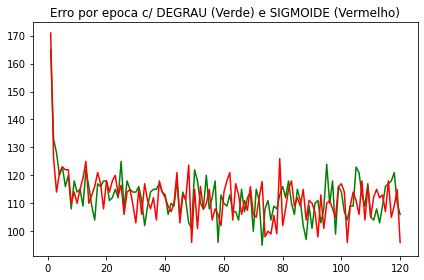

In [27]:
coord_x = list(range(1, maximo_iteracoes))
plt.title("Erro por epoca c/ DEGRAU (Verde) e SIGMOIDE (Vermelho)")
plt.plot(coord_x, coord_yDEGRAU,color="green")
plt.plot(coord_x, coord_ySIGMOIDE,color="red")
plt.show()

In [28]:
print("Acuracia para a Rede Neural utilizando a função DEGRAU foi de: " + str(acuracia_degrau * 100) + "%")
print("Acuracia para a Rede Neural utilizando a função SIGMOIDE foi de: " + str(acuracia_sigmoide * 100) + "%")

Acuracia para a Rede Neural utilizando a função DEGRAU foi de: 65.59139784946237%
Acuracia para a Rede Neural utilizando a função SIGMOIDE foi de: 73.11827956989248%
